In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv("/kaggle/input/metro-house-price/Metro city House Price.csv")

df.info()
import warnings 
warnings.filterwarnings("ignore")


/kaggle/input/metro-house-price/Metro city House Price.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   record_id                         100000 non-null  object 
 1   ingestion_date                    100000 non-null  object 
 2   metro_city                        100000 non-null  object 
 3   locality_area                     100000 non-null  object 
 4   house_type                        100000 non-null  object 
 5   bhk_type                          100000 non-null  object 
 6   total_area_sqft                   100000 non-null  int64  
 7   num_bathrooms                     100000 non-null  int64  
 8   extraspace_and_parking            100000 non-null  object 
 9   furnishing                        100000 non-null  object 
 10  floor_no                          100000 non-null  int64  

In [2]:
df["extraspace_and_parking"].unique()

array(['no_extra', 'extra_space_only', 'extra_space+car_parking',
       'car_parking_only'], dtype=object)

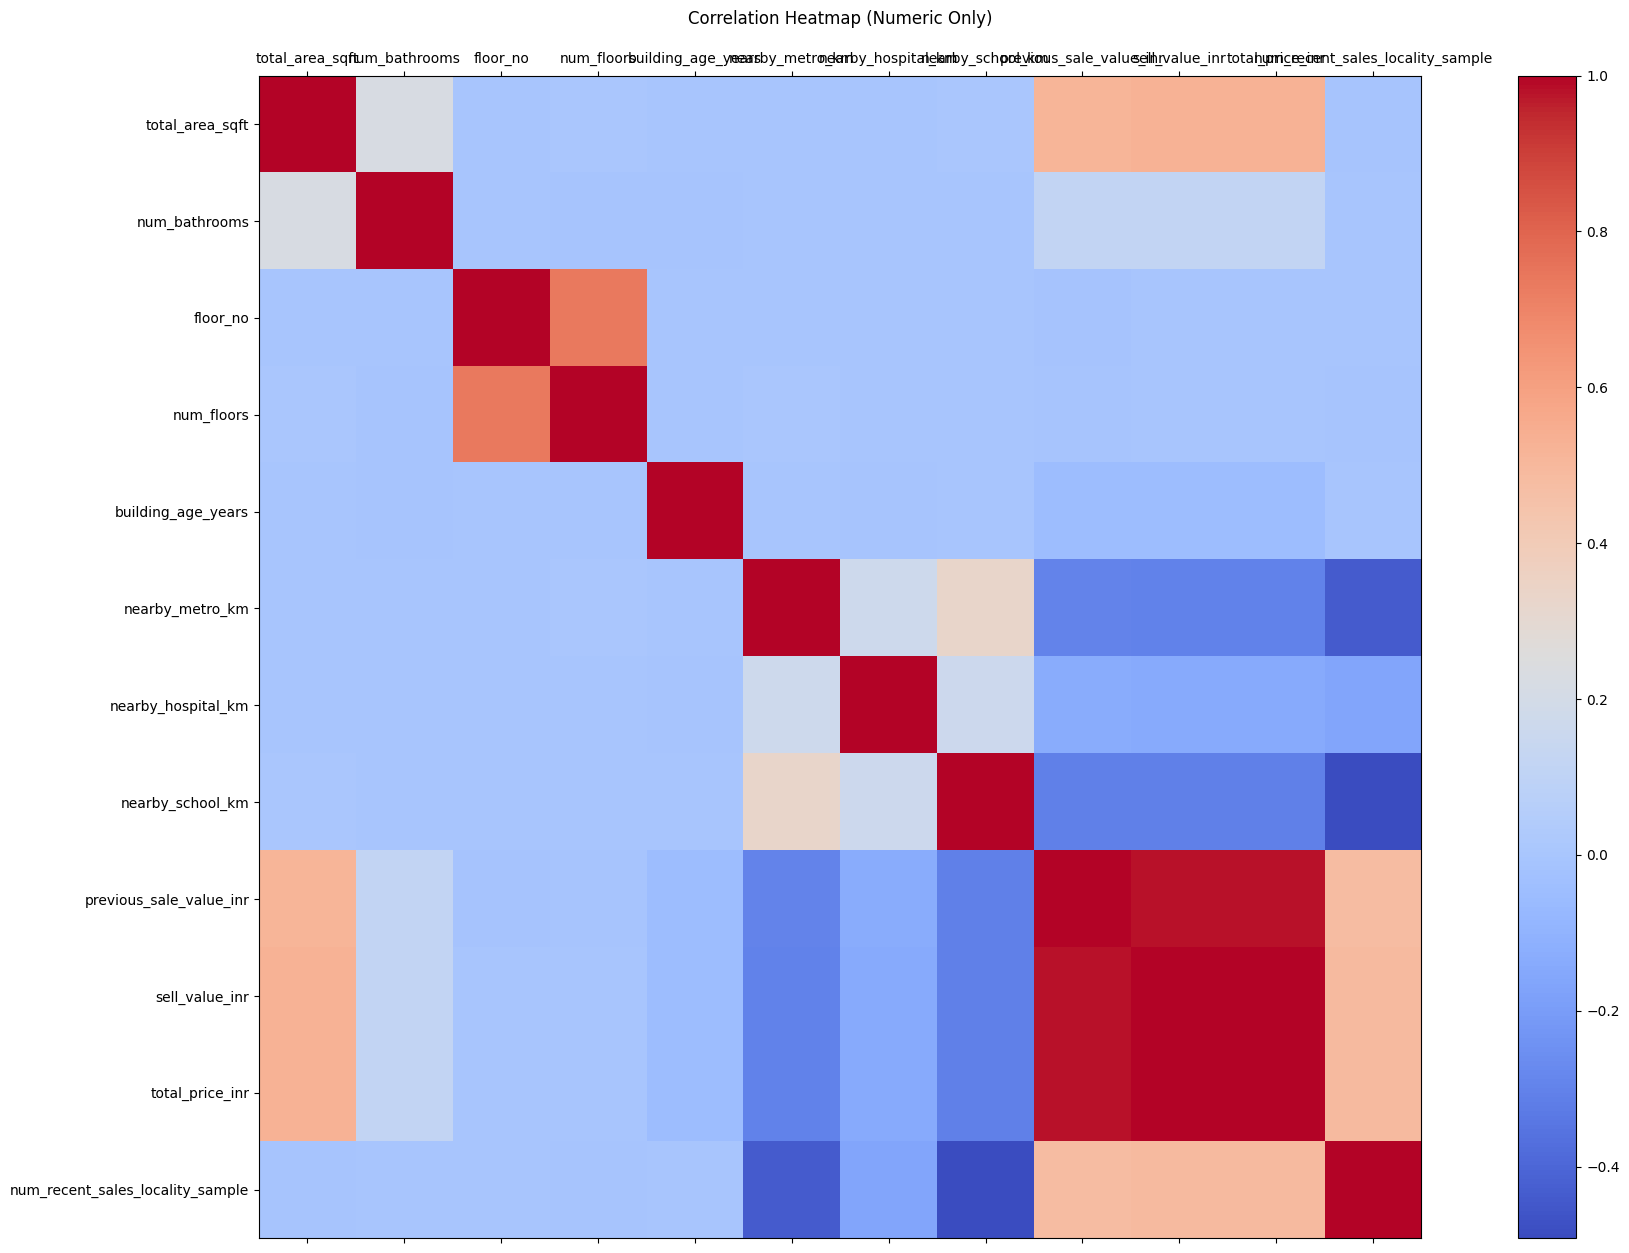

In [3]:
import matplotlib.pyplot as  plt
numeric_df = df.select_dtypes(include='number')  # or 'int', 'float'

# Compute correlation
corr = numeric_df.corr()
plt.figure(figsize=(25, 15))
plt.matshow(corr, cmap='coolwarm', fignum=1)
plt.colorbar()
# Add labels
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numeric Only)", pad=20)
plt.show()


In [4]:
df.describe()

,total_area_sqft,num_bathrooms,floor_no,num_floors,building_age_years,nearby_metro_km,nearby_hospital_km,nearby_school_km,previous_sale_value_inr,sell_value_inr,total_price_inr,num_recent_sales_locality_sample
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,2.999700e+04,1.000000e+05,1.000000e+05,100000.000000
mean,1228.649930,2.164720,5.360830,9.743210,9.530430,1.587267,1.520871,0.976369,1.335954e+07,1.722744e+07,1.722744e+07,1633.689040
std,588.678155,1.226076,5.259896,7.736001,10.021998,0.799930,0.719131,0.439687,1.158301e+07,1.467048e+07,1.467048e+07,324.064259
min,250.000000,1.000000,1.000000,1.000000,0.000000,0.050000,0.050000,0.020000,3.408580e+05,5.062600e+05,5.062600e+05,980.000000
25%,835.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.020000,0.660000,6.202935e+06,8.133522e+06,8.133522e+06,1456.000000
50%,1100.000000,2.000000,3.000000,7.000000,6.000000,1.480000,1.480000,0.920000,9.786154e+06,1.277432e+07,1.277432e+07,1544.000000
75%,1498.000000,3.000000,8.000000,16.000000,13.000000,2.070000,1.980000,1.230000,1.627510e+07,2.093999e+07,2.093999e+07,1976.000000
max,5320.000000,10.000000,25.000000,25.000000,80.000000,6.020000,5.360000,3.810000,1.608374e+08,1.897330e+08,1.897330e+08,2086.000000


In [5]:
df["metro_city"].unique()
#["Mumbai", "Delhi", "Bengaluru", "Chennai", "Hyderabad", "Kolkata", "Pune", "Ahmedabad"]


array(['Chennai', 'Pune', 'Delhi NCR', 'Mumbai', 'Hyderabad', 'Ahmedabad',
       'Kolkata', 'Bengaluru'], dtype=object)

In [6]:
count = df["sell_value_inr"] == df["total_price_inr"]


In [7]:
df = df.drop(
    columns=["record_id", "ingestion_date", "previous_sale_exists",
             "previous_sale_date", "sell_value_inr",
             "num_recent_sales_locality_sample", "confidence_flag"]
)

In [8]:
df["accessibility_index"] = 1/df[["nearby_metro_km", "nearby_hospital_km", "nearby_school_km"]].mean(axis=1)

In [9]:
df["accessibility_index"].describe()

count    100000.000000
mean          0.830319
std           0.329528
min           0.269058
25%           0.609756
50%           0.759494
75%           0.970874
max           7.894737
Name: accessibility_index, dtype: float64

In [10]:
df.describe()

,total_area_sqft,num_bathrooms,floor_no,num_floors,building_age_years,nearby_metro_km,nearby_hospital_km,nearby_school_km,previous_sale_value_inr,total_price_inr,accessibility_index
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,2.999700e+04,1.000000e+05,100000.000000
mean,1228.649930,2.164720,5.360830,9.743210,9.530430,1.587267,1.520871,0.976369,1.335954e+07,1.722744e+07,0.830319
std,588.678155,1.226076,5.259896,7.736001,10.021998,0.799930,0.719131,0.439687,1.158301e+07,1.467048e+07,0.329528
min,250.000000,1.000000,1.000000,1.000000,0.000000,0.050000,0.050000,0.020000,3.408580e+05,5.062600e+05,0.269058
25%,835.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.020000,0.660000,6.202935e+06,8.133522e+06,0.609756
50%,1100.000000,2.000000,3.000000,7.000000,6.000000,1.480000,1.480000,0.920000,9.786154e+06,1.277432e+07,0.759494
75%,1498.000000,3.000000,8.000000,16.000000,13.000000,2.070000,1.980000,1.230000,1.627510e+07,2.093999e+07,0.970874
max,5320.000000,10.000000,25.000000,25.000000,80.000000,6.020000,5.360000,3.810000,1.608374e+08,1.897330e+08,7.894737


In [11]:
df["house_type"].unique()

array(['apartment', 'villa', 'independent_house', 'studio', 'row_house',
       'other'], dtype=object)

In [12]:
df['floor_no'].describe()

count    100000.000000
mean          5.360830
std           5.259896
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          25.000000
Name: floor_no, dtype: float64

In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_area_sqft,100000.00,1228.65,588.68,250.00,835.00,1100.00,1498.00,5320.00
num_bathrooms,100000.00,2.16,1.23,1.00,1.00,2.00,3.00,10.00
floor_no,100000.00,5.36,5.26,1.00,1.00,3.00,8.00,25.00
num_floors,100000.00,9.74,7.74,1.00,3.00,7.00,16.00,25.00
building_age_years,100000.00,9.53,10.02,0.00,2.00,6.00,13.00,80.00
nearby_metro_km,100000.00,1.59,0.80,0.05,1.00,1.48,2.07,6.02
nearby_hospital_km,100000.00,1.52,0.72,0.05,1.02,1.48,1.98,5.36
nearby_school_km,100000.00,0.98,0.44,0.02,0.66,0.92,1.23,3.81
previous_sale_value_inr,29997.00,13359538.38,11583010.74,340858.00,6202935.00,9786154.00,16275101.00,160837406.00
total_price_inr,100000.00,17227442.61,14670480.26,506260.00,8133521.75,12774315.50,20939986.00,189733040.00


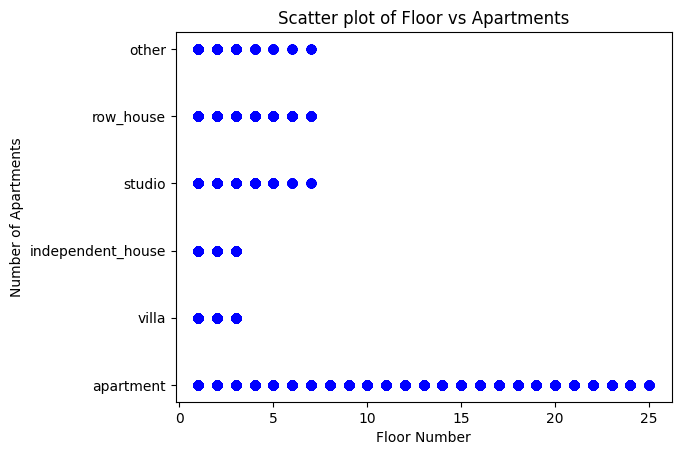

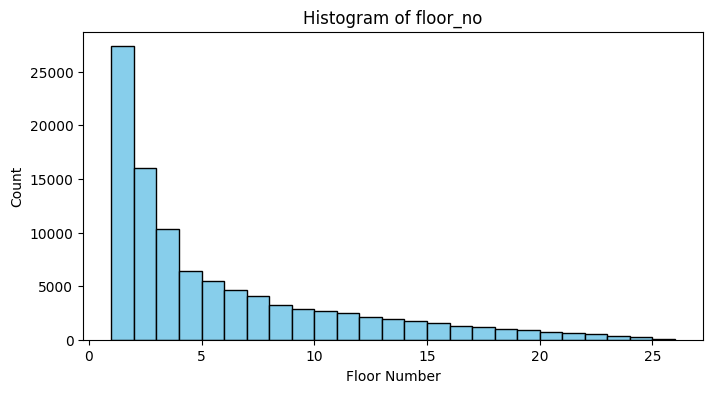

In [15]:
plt.scatter(df["floor_no"], df["house_type"], color='blue', marker='o')  # marker can be 'o', '^', 's', etc.
plt.xlabel('Floor Number')
plt.ylabel('Number of Apartments')
plt.title('Scatter plot of Floor vs Apartments')
plt.show()


plt.figure(figsize=(8,4))
plt.hist(df['floor_no'], bins=range(1, max(df['floor_no'])+2), color='skyblue', edgecolor='black')
plt.xlabel('Floor Number')
plt.ylabel('Count')
plt.title('Histogram of floor_no')
plt.show()

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_area_sqft,100000.00,1228.65,588.68,250.00,835.00,1100.00,1498.00,5320.00
num_bathrooms,100000.00,2.16,1.23,1.00,1.00,2.00,3.00,10.00
floor_no,100000.00,5.36,5.26,1.00,1.00,3.00,8.00,25.00
num_floors,100000.00,9.74,7.74,1.00,3.00,7.00,16.00,25.00
building_age_years,100000.00,9.53,10.02,0.00,2.00,6.00,13.00,80.00
nearby_metro_km,100000.00,1.59,0.80,0.05,1.00,1.48,2.07,6.02
nearby_hospital_km,100000.00,1.52,0.72,0.05,1.02,1.48,1.98,5.36
nearby_school_km,100000.00,0.98,0.44,0.02,0.66,0.92,1.23,3.81
previous_sale_value_inr,29997.00,13359538.38,11583010.74,340858.00,6202935.00,9786154.00,16275101.00,160837406.00
total_price_inr,100000.00,17227442.61,14670480.26,506260.00,8133521.75,12774315.50,20939986.00,189733040.00


In [17]:
df = df[(df["total_area_sqft"] >= 500) & (df["total_area_sqft"] < 4000)]

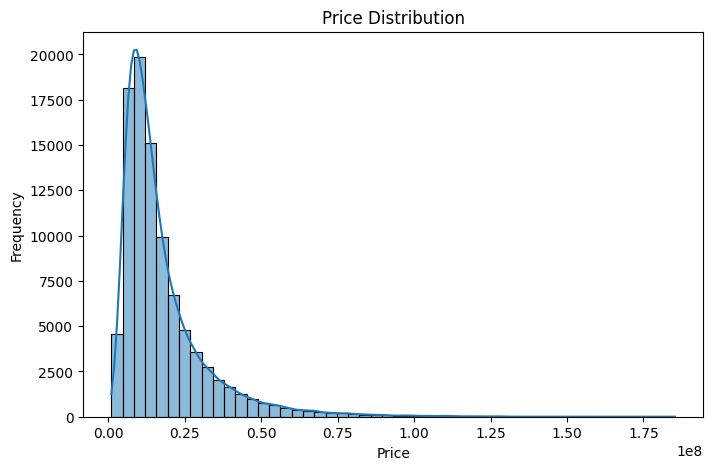

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['total_price_inr'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


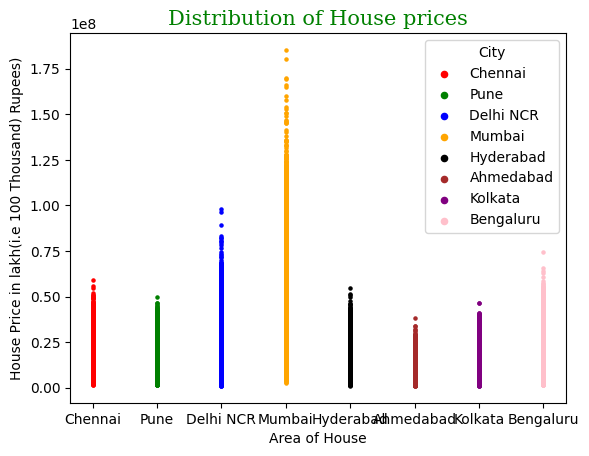

In [19]:
import matplotlib.pyplot as plt

# Generate a list of colors dynamically (so you never run out)


for color,city in zip(['r','g','b','orange','black','brown','purple', 'pink', 'cyan', 'olive'],df.metro_city.unique()):
    temp_df = df[df['metro_city']==city]
    x, y = temp_df['metro_city'],temp_df['total_price_inr']
    plt.scatter(x,y,color=color,s=5,label=city)
    
plt.xlabel('Area of House')
plt.ylabel('House Price in lakh(i.e 100 Thousand) Rupees)')
plt.title("Distribution of House prices",font="Serif", size=15,color='g')
plt.legend(markerscale=2,title='City')

plt.show()

In [20]:
df.describe()

,total_area_sqft,num_bathrooms,floor_no,num_floors,building_age_years,nearby_metro_km,nearby_hospital_km,nearby_school_km,previous_sale_value_inr,total_price_inr,accessibility_index
count,95516.00,95516.00,95516.00,95516.00,95516.00,95516.00,95516.00,95516.00,28674.00,95516.00,95516.00
mean,1258.65,2.18,5.36,9.75,9.53,1.59,1.52,0.98,13670558.26,17634631.37,0.83
std,561.96,1.23,5.26,7.74,10.03,0.80,0.72,0.44,11560709.56,14643185.92,0.33
min,500.00,1.00,1.00,1.00,0.00,0.05,0.05,0.02,747700.00,939853.00,0.27
25%,874.00,1.00,1.00,3.00,2.00,1.00,1.02,0.66,6503313.25,8512871.25,0.61
50%,1123.00,2.00,3.00,7.00,6.00,1.48,1.48,0.92,10082668.00,13111875.00,0.76
75%,1518.00,3.00,8.00,16.00,13.00,2.07,1.98,1.23,16619782.75,21406287.00,0.97
max,3999.00,10.00,25.00,25.00,80.00,6.02,5.36,3.81,138042009.00,185313168.00,7.89


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def remove_outliers_by_city(df, column='total_price_inr', group='metro_city'):
    cleaned_dfs = []
    for city, group_df in df.groupby(group):
        Q1 = group_df[column].quantile(0.25)
        Q3 = group_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        filtered = group_df[(group_df[column] >= lower) & (group_df[column] <= upper)]
        cleaned_dfs.append(filtered)
    return pd.concat(cleaned_dfs, axis=0)

df_clean = remove_outliers_by_city(df)

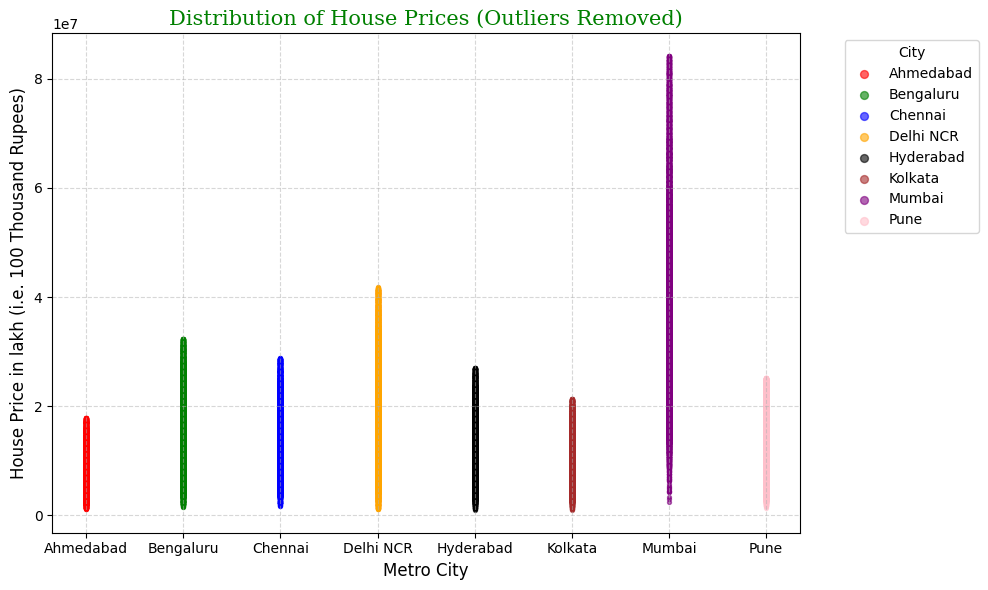

In [22]:
# Scatter plot
colors = ['r','g','b','orange','black','brown','purple','pink','cyan','olive']
plt.figure(figsize=(10,6))

for color, city in zip(colors, df_clean['metro_city'].unique()):
    temp_df = df_clean[df_clean['metro_city'] == city]
    x, y = temp_df['metro_city'], temp_df['total_price_inr']
    plt.scatter(x, y, color=color, s=8, alpha=0.6, label=city)

# Labels and formatting
plt.xlabel('Metro City', fontsize=12)
plt.ylabel('House Price in lakh (i.e. 100 Thousand Rupees)', fontsize=12)
plt.title("Distribution of House Prices (Outliers Removed)", font="Serif", size=15, color='g')
plt.legend(markerscale=2, title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [23]:
print(f"Original count: {len(df)}")
print(f"After cleaning: {len(df_clean)}")


Original count: 95516
After cleaning: 91872


In [24]:
dfn = df_clean

In [25]:
dfn = dfn.drop(["nearby_metro_km","nearby_hospital_km","nearby_school_km"],axis = 1)

In [26]:
dfn = dfn.drop(["previous_sale_value_inr",],axis = 1)

In [27]:
dfn = dfn.drop(["building_age_years","num_floors"],axis = 1)

In [28]:
dfn=dfn.drop(["floor_no"],axis=1)

In [29]:
dfn.isnull().sum()

metro_city                0
locality_area             0
house_type                0
bhk_type                  0
total_area_sqft           0
num_bathrooms             0
extraspace_and_parking    0
furnishing                0
total_price_inr           0
accessibility_index       0
dtype: int64

In [30]:
df["num_bathrooms"].describe()

count   95516.00
mean        2.18
std         1.23
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        10.00
Name: num_bathrooms, dtype: float64

In [31]:
# Train a basic models 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet


X = dfn.drop(["total_price_inr"],axis = 1)
y = dfn["total_price_inr"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

print(y_train.shape)

(68904, 9)
(22968, 9)
(22968,)
(68904,)


In [32]:
import numpy as np 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

# ColumnTransformer with correct tuple syntax
from sklearn.preprocessing import PowerTransformer, RobustScaler

# Use RobustScaler for outlier-heavy data
preprocessor = ColumnTransformer([
    ("numeric", RobustScaler(), make_column_selector(dtype_include=np.number)),
    ("catg", OneHotEncoder(drop='first', handle_unknown='ignore'), 
     make_column_selector(dtype_include=object))
])

In [33]:
dfn

,metro_city,locality_area,house_type,bhk_type,total_area_sqft,num_bathrooms,extraspace_and_parking,furnishing,total_price_inr,accessibility_index
13,Ahmedabad,Bodakdev,other,2BHK,922,1,extra_space_only,unfurnished,7702197,0.44
18,Ahmedabad,Navrangpura,apartment,3BHK,1897,3,no_extra,semi_furnished,10632169,0.54
58,Ahmedabad,SG Road,apartment,1BHK,506,1,no_extra,furnished,2639483,0.81
73,Ahmedabad,Science City Road,row_house,2BHK,1051,1,no_extra,furnished,2642283,0.46
75,Ahmedabad,Naranpura,apartment,2BHK,855,1,no_extra,unfurnished,7707702,0.78
...,...,...,...,...,...,...,...,...,...,...
99962,Pune,Hinjewadi,apartment,2BHK,1134,4,no_extra,furnished,9582849,0.81
99965,Pune,Wakad,apartment,2BHK,943,1,no_extra,unfurnished,10212343,0.51
99979,Pune,Kharadi,apartment,2BHK,960,3,car_parking_only,unfurnished,11191561,0.81
99996,Pune,Kharadi,villa,3BHK,1337,2,no_extra,unfurnished,12319126,0.67


In [34]:
dfn.describe()

,total_area_sqft,num_bathrooms,total_price_inr,accessibility_index
count,91872.00,91872.00,91872.00,91872.00
mean,1204.50,2.16,16500896.87,0.83
std,488.08,1.23,12635042.73,0.33
min,500.00,1.00,939853.00,0.27
25%,863.00,1.00,8355484.50,0.61
50%,1103.00,2.00,12720524.50,0.76
75%,1460.00,3.00,20037049.50,0.97
max,3992.00,10.00,84191064.00,7.89


Preprocessor

In [35]:
preprocessor

ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x793d87478c10>),
                                ('catg',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x793d8981a250>)])

Train LinearModel

In [36]:
from sklearn.metrics import r2_score
modellinear = Pipeline(steps = [ ("preprocessor",preprocessor),
                               ("model",LinearRegression())])

modellinear.fit(X_train,y_train)

linear_pred = modellinear.predict(X_test)
linear_predtra = modellinear.predict(X_train)

linear_pred[0]

print(r2_score(y_test,linear_pred)*100)
print(r2_score(y_train,linear_predtra)*100)

74.25049151625116
74.90696640952919


In [37]:
from sklearn.metrics import r2_score,mean_absolute_error

print("test r2",r2_score(y_test,linear_pred)*100)
print(mean_absolute_error(y_test,linear_pred))
print("train",r2_score(y_train,linear_predtra)*100)


test r2 74.25049151625116
4343912.914644553
train 74.90696640952919


In [38]:
#Training XGBoost Model 
import xgboost as xgb

preprocessor = ColumnTransformer([
    ("numeric", RobustScaler(), make_column_selector(dtype_include=np.number)),
    ("catg", OneHotEncoder(drop='first', handle_unknown='ignore'), 
     make_column_selector(dtype_include=object))
])

In [39]:
xgb= xgb.XGBRegressor(
    booster='gbtree',
    n_estimators=950,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    reg_alpha=0.1,
    gamma=1,
    random_state=42
)

In [40]:
#XGBoost Pipeline
xgbmodel = Pipeline(steps=[("preprocessor",preprocessor),
                          ("model",xgb)])

In [41]:
xgbmodel

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x793d87622310>),
                                                 ('catg',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x793d86b94390>)])),
                ('model',
                 XGBRegressor(base_score=...
                              feature_types=None, gamma=1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=950, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [42]:
xgbmodel.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x793d87622310>),
                                                 ('catg',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x793d86b94390>)])),
                ('model',
                 XGBRegressor(base_score=...
                              feature_types=None, gamma=1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=950, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [43]:
xgby_pred = xgbmodel.predict(X_test)

In [44]:
xgby_pred[0]

8735368.0

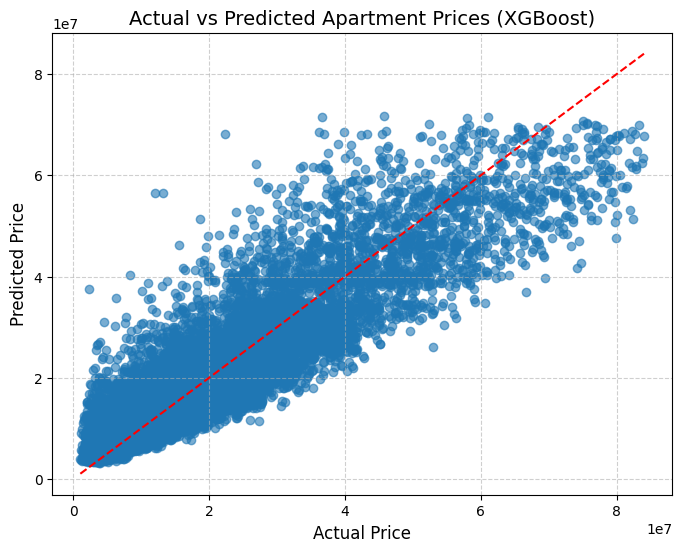

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(y_test, xgby_pred, alpha=0.6)
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.title("Actual vs Predicted Apartment Prices (XGBoost)", fontsize=14)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [46]:
import pandas as pd

# Combine into a single table
comparison = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": xgby_pred,
    "Error": y_test - xgby_pred
})

# Show first 10 rows
print(comparison.head(10))


       Actual Price  Predicted Price        Error
56650       7168737       8735368.00  -1566631.00
61515      15272078      14983932.00    288146.00
387        19988059      25656032.00  -5667973.00
30628       8037866      21087214.00 -13049348.00
34590      20099991      23286970.00  -3186979.00
90096      18238207      18917104.00   -678897.00
23235      14410360      15188915.00   -778555.00
26463      22943893      18109522.00   4834371.00
60239       7019566       8969446.00  -1949880.00
35020      15324734      12885057.00   2439677.00


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, xgby_pred)
rmse = mean_squared_error(y_test, xgby_pred, squared=False)  # sqrt(MSE)
mae = mean_absolute_error(y_test, xgby_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


MSE: 29100212724401.242
RMSE: 5394461.300667681
MAE: 3710520.0684321667


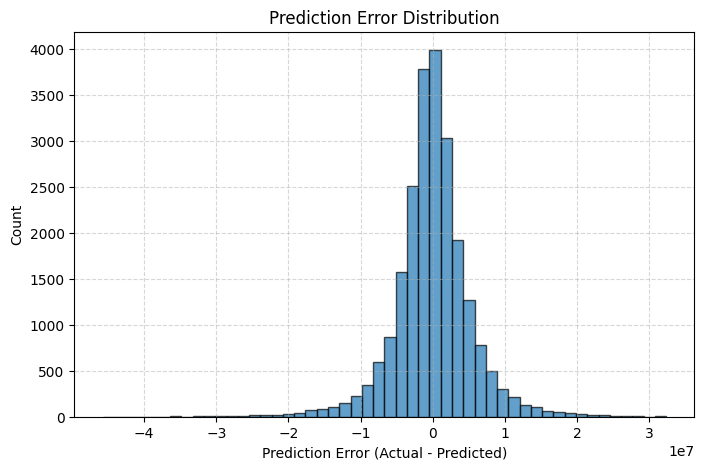

In [48]:
import matplotlib.pyplot as plt

errors = y_test - xgby_pred

plt.figure(figsize=(8,5))
plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [49]:
#training LightGBM
import lightgbm as lgb 

In [58]:
lgbm = lgb.LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.01,
    max_depth=-1,          # no limit, let num_leaves control complexity
    num_leaves=100,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.01,
    reg_lambda=0.01,
    random_state=42,
    n_jobs=-1,
    verbose=-1

)

In [59]:
#LightGBM Pipeline
lgbmodel = Pipeline(steps = [("preprocessor",preprocessor),
                            ("model",lgbm)])

In [60]:
lgbmodel

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x793d87622310>),
                                                 ('catg',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x793d86b94390>)])),
                ('model',
                 LGBMRegressor(colsample_bytree=0.9, learning_rate=0.01,
                               n_estimators=1500, n_jobs=-1, num_leaves=100,
                               random_state=42, reg_alpha=0.01, reg_lambda=0.01,
                               subsample=0.9, verbose=-1))])

In [61]:
lgbmodel.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x793d87622310>),
                                                 ('catg',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x793d86b94390>)])),
                ('model',
                 LGBMRegressor(colsample_bytree=0.9, learning_rate=0.01,
                               n_estimators=1500, n_jobs=-1, num_leaves=100,
                               random_state=42, reg_alpha=0.01, reg_lambda=0.01,
                               subsample=0.9, verbose=-1))])

In [62]:
lgb_pred = lgbmodel.predict(X_test)
lgb_predtr = lgbmodel.predict(X_train)

In [63]:
lgb_pred[1]

14916066.654463477

In [64]:
from sklearn.metrics import r2_score,mean_absolute_error

In [65]:
print("train r2:",r2_score(y_train,lgb_predtr)*100)
print("test r2:",r2_score(y_test,lgb_pred)*100)


train r2: 86.4232085812823
test r2: 80.94238219779197


In [76]:
dfn.info()
#"metro_city": metro_city,
        "locality_area": locality_area,
        "house_type": house_type,
        "bhk_type": bhk_type,
        "total_area_sqft": total_area_sqft,
        "num_bathrooms": num_bathrooms,
        "extraspace_parking":extraspace_and_parking,
        "furnishing": furnishing,
        "accessibility_index": accessibility_index

<class 'pandas.core.frame.DataFrame'>
Index: 91872 entries, 13 to 99997
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   metro_city              91872 non-null  object 
 1   locality_area           91872 non-null  object 
 2   house_type              91872 non-null  object 
 3   bhk_type                91872 non-null  object 
 4   total_area_sqft         91872 non-null  int64  
 5   num_bathrooms           91872 non-null  int64  
 6   extraspace_and_parking  91872 non-null  object 
 7   furnishing              91872 non-null  object 
 8   total_price_inr         91872 non-null  int64  
 9   accessibility_index     91872 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 7.7+ MB


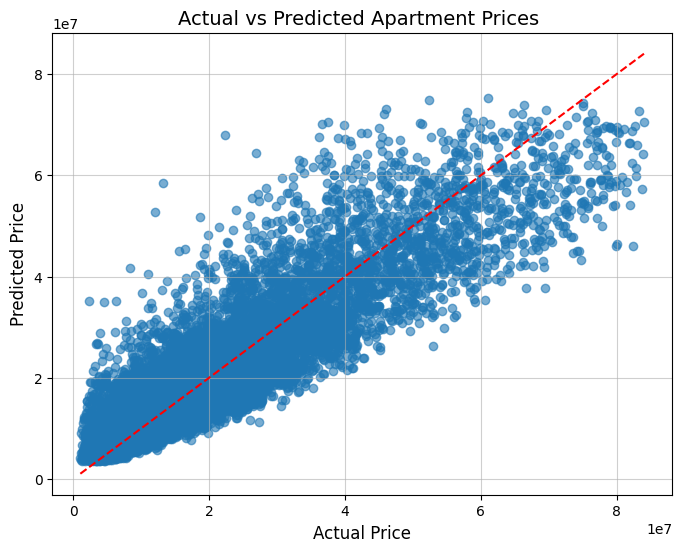

In [66]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(y_test, lgb_pred, alpha=0.6)
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.title("Actual vs Predicted Apartment Prices ", fontsize=14)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()



In [67]:
#importing MOdel For Production
import joblib
joblib.dump(lgbmodel,"LightGBM")


['LightGBM']

In [ ]:
#import Model 
joblib.dump(xgbmodel,"Xgboostmodel")

In [68]:
import os
os.listdir("/kaggle/working")

['LightGBM', '.virtual_documents']

Stacking using Both Pre Trained Models 


In [70]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,KFold


In [71]:
#  Meta Model 
meta_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
# --- Stacking Regressor ---
stack = StackingRegressor(
    estimators=[
        ('lgbm', lgbmodel),
        ('xgb',xgbmodel)
    ],
    final_estimator=meta_model,
    passthrough=False,  
    n_jobs=-1,
    cv=KFold(n_splits=10, shuffle=True, random_state=42)
)

In [72]:
# --- Fit & Predict ---
stack.fit(X_train, y_train)
y_pred_train = stack.predict(X_train)
y_pred_test = stack.predict(X_test)

# --- Evaluate ---
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test  R²:", r2_score(y_test, y_pred_test))

Train R²: 0.8375073537658402
Test  R²: 0.8127340990707421


In [73]:
import joblib


In [74]:
joblib.dump(stack,"Finals_Model.pkl")

['Finals_Model.pkl']

In [ ]:
import os
print("Current directory:", os.getcwd())


In [ ]:
import os
os.listdir("/kaggle/working")


In [ ]:
from IPython.display import FileLink
FileLink('/kaggle/working/Final_Model.pkl')


In [ ]:
import numpy as np

y_train_log = np.log1p(y_train)  # log(1 + y)
y_pred_log = stack.predict(X_test)
y_pred = np.expm1(y_pred_log)    # revert to original scale


In [ ]:
import pandas as pd
# Combine into a single table
comparison = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred_test,
    "Error": y_test - y_pred_test
})
# Show first 10 rows
print(comparison.head(10))

In [ ]:
# Predictions in log space
print("Predictions in log-space:")
print(y_pred_log[:10])  # first 10 predictions
# Predictions in original space
print("Predictions in original price space:")
print(y_pred[:10])  # first 10 predictions

In [ ]:
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
import lightgbm as lgb
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Preprocessor
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, make_column_selector(dtype_include=["int64","float64"])),
    ("cat", categorical_transformer, make_column_selector(dtype_include=["object","category"]))
])
# Base models
lgb_model = Pipeline([("preprocessor", preprocessor), ("model", lgb.LGBMRegressor(n_estimators=1000))])
xgb_model = Pipeline([("preprocessor", preprocessor), ("model", xgb.XGBRegressor(n_estimators=1000))])
# Meta model
meta_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
# Stacking
stack = StackingRegressor(
    estimators=[("lgb", lgb_model), ("xgb", xgb_model)],
    final_estimator=meta_model,
    passthrough=False,
    n_jobs=-1
)
# Train on log-transformed target
y_train_log = np.log1p(y_train)
stack.fit(X_train, y_train_log)
# Predict and revert to original scale
y_pred_log = stack.predict(X_test)
y_pred = np.expm1(y_pred_log)

In [ ]:
print("Test  R²:", r2_score(y_test, y_pred ))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")